# Random Forest

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [22]:
# Load the Excel file
excel_file = 'glass.xlsx'

# Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheets in the file:", sheet_names)

Sheets in the file: ['Description', 'glass']


In [23]:
# Load the "Data" sheet
df= pd.read_excel(excel_file, sheet_name="glass")

In [24]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


**1. Exploratory Data Analysis (EDA):**


In [25]:
print(df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [26]:
print(df.tail())

          RI     Na   Mg    Al     Si     K    Ca    Ba   Fe  Type
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0     7


In [27]:
print(df.columns)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [28]:
# Summary statistics
print(df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [29]:
# Check for missing values
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [30]:
# Check data types of each column
print(df.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


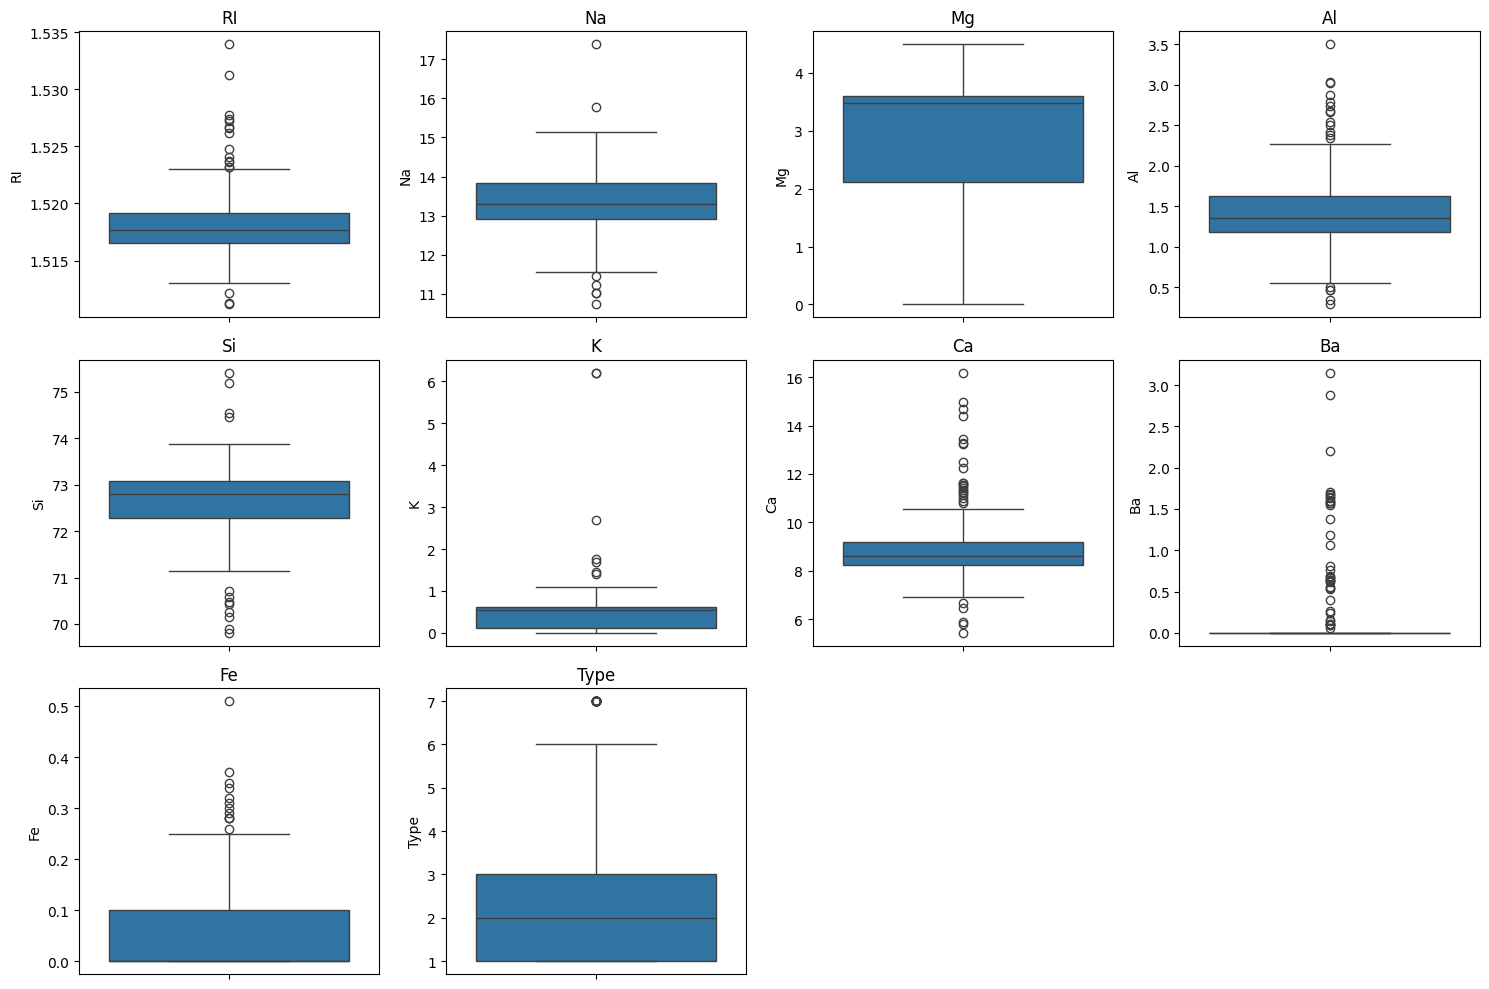

In [31]:
# Check for outliers using box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

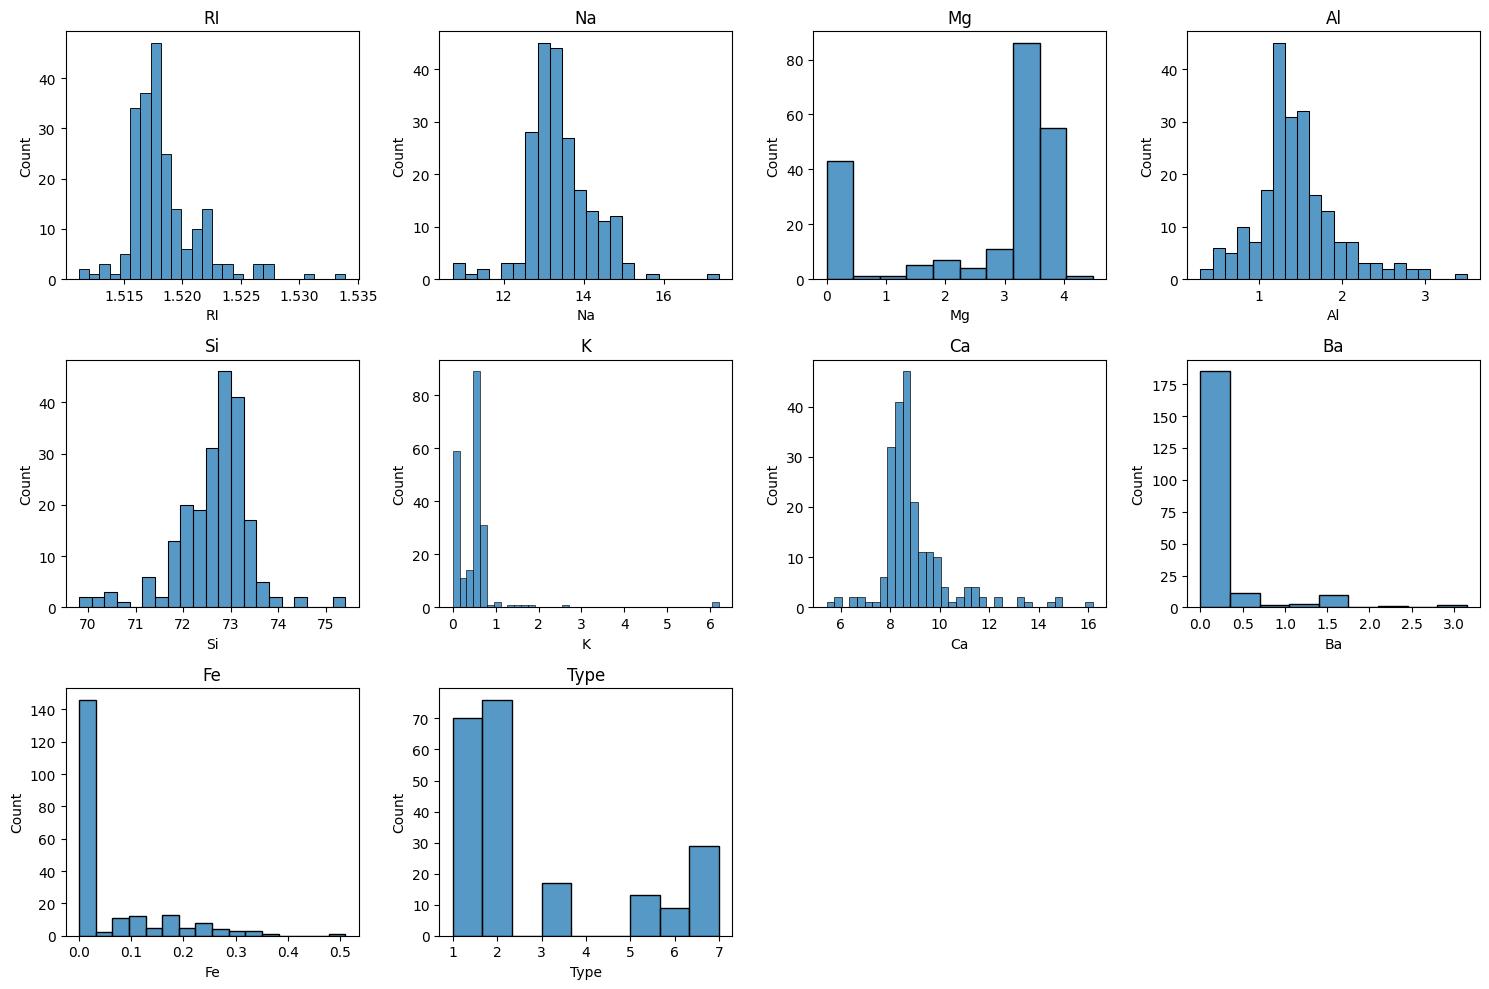

In [32]:
# Histograms for data distribution
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

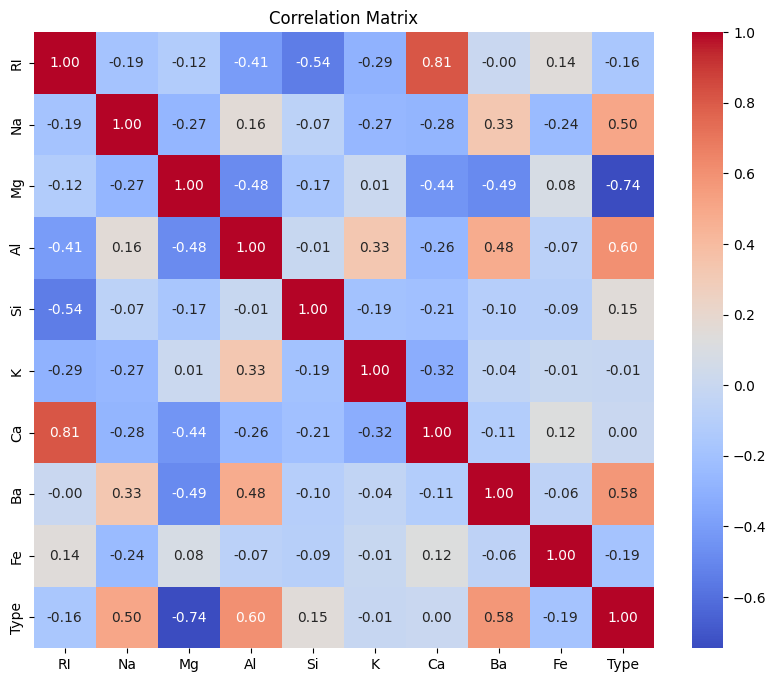

In [33]:
# Correlation matrix (heatmap) for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [34]:
# Value counts for categorical features (if any)
for col in df.select_dtypes(include='object').columns:
  print(f"\nValue counts for {col}:\n{df[col].value_counts()}")

2: Data Visualization:

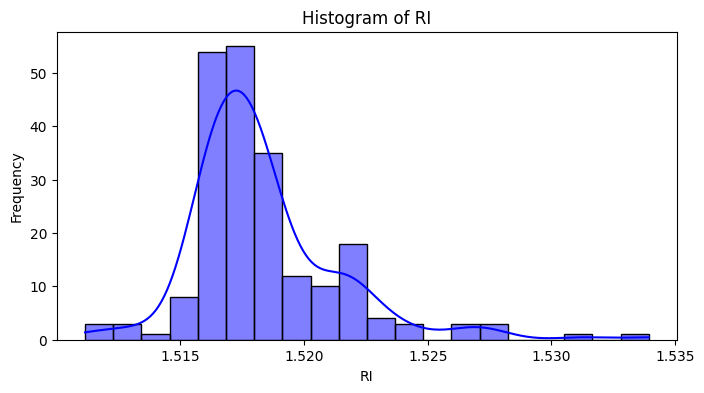

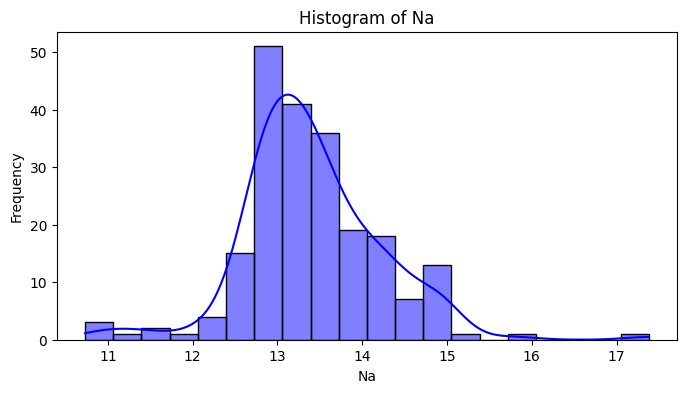

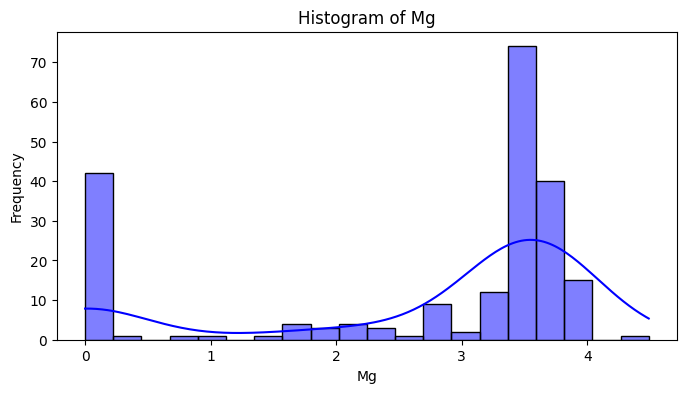

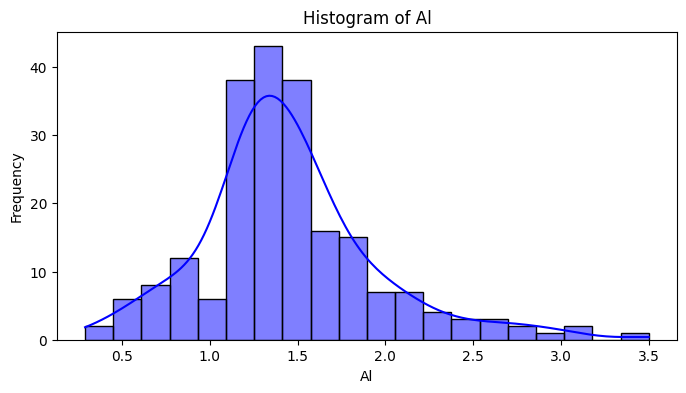

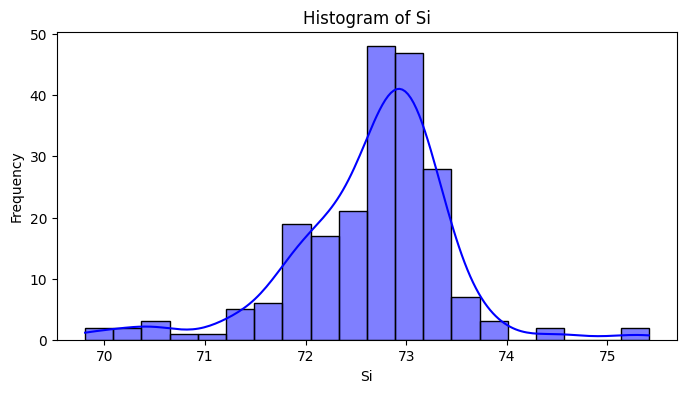

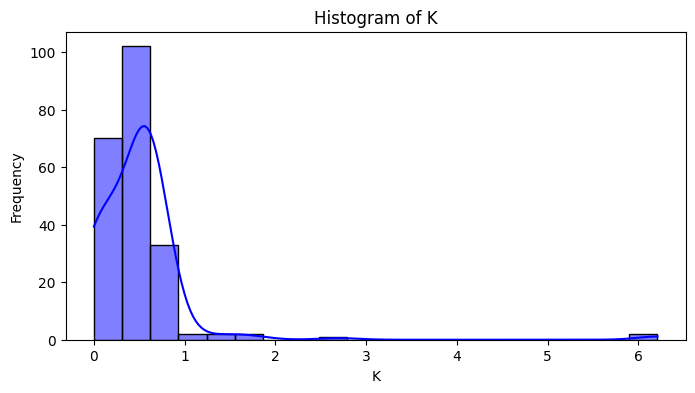

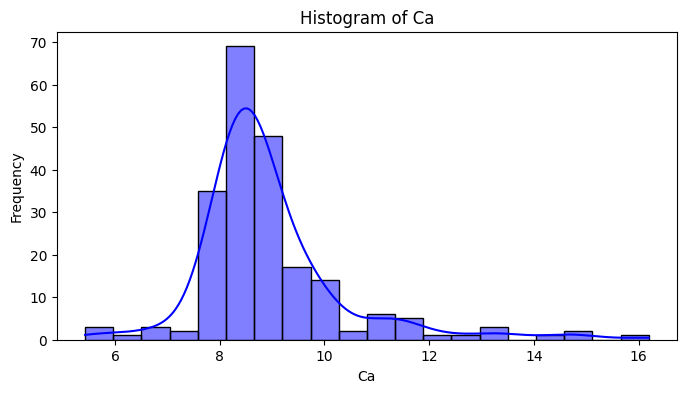

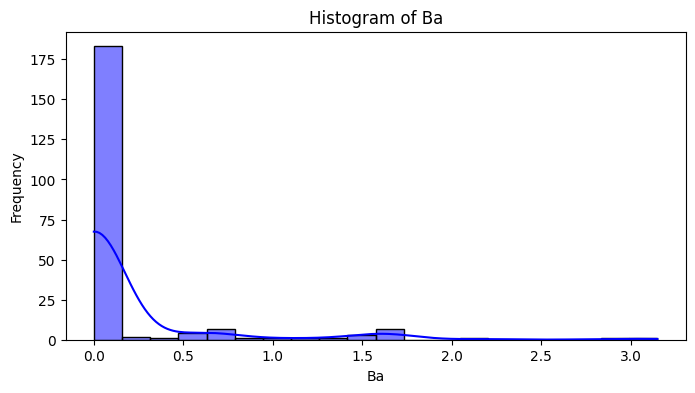

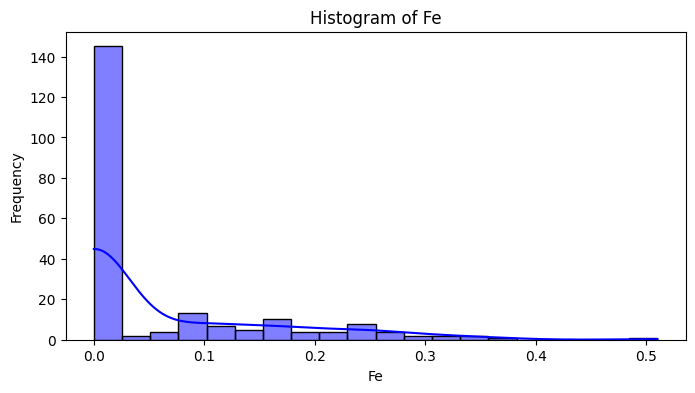

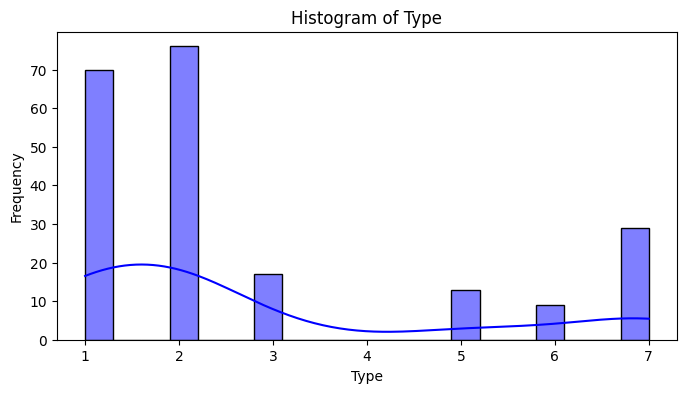

In [35]:
# Histograms
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=20, color="blue")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

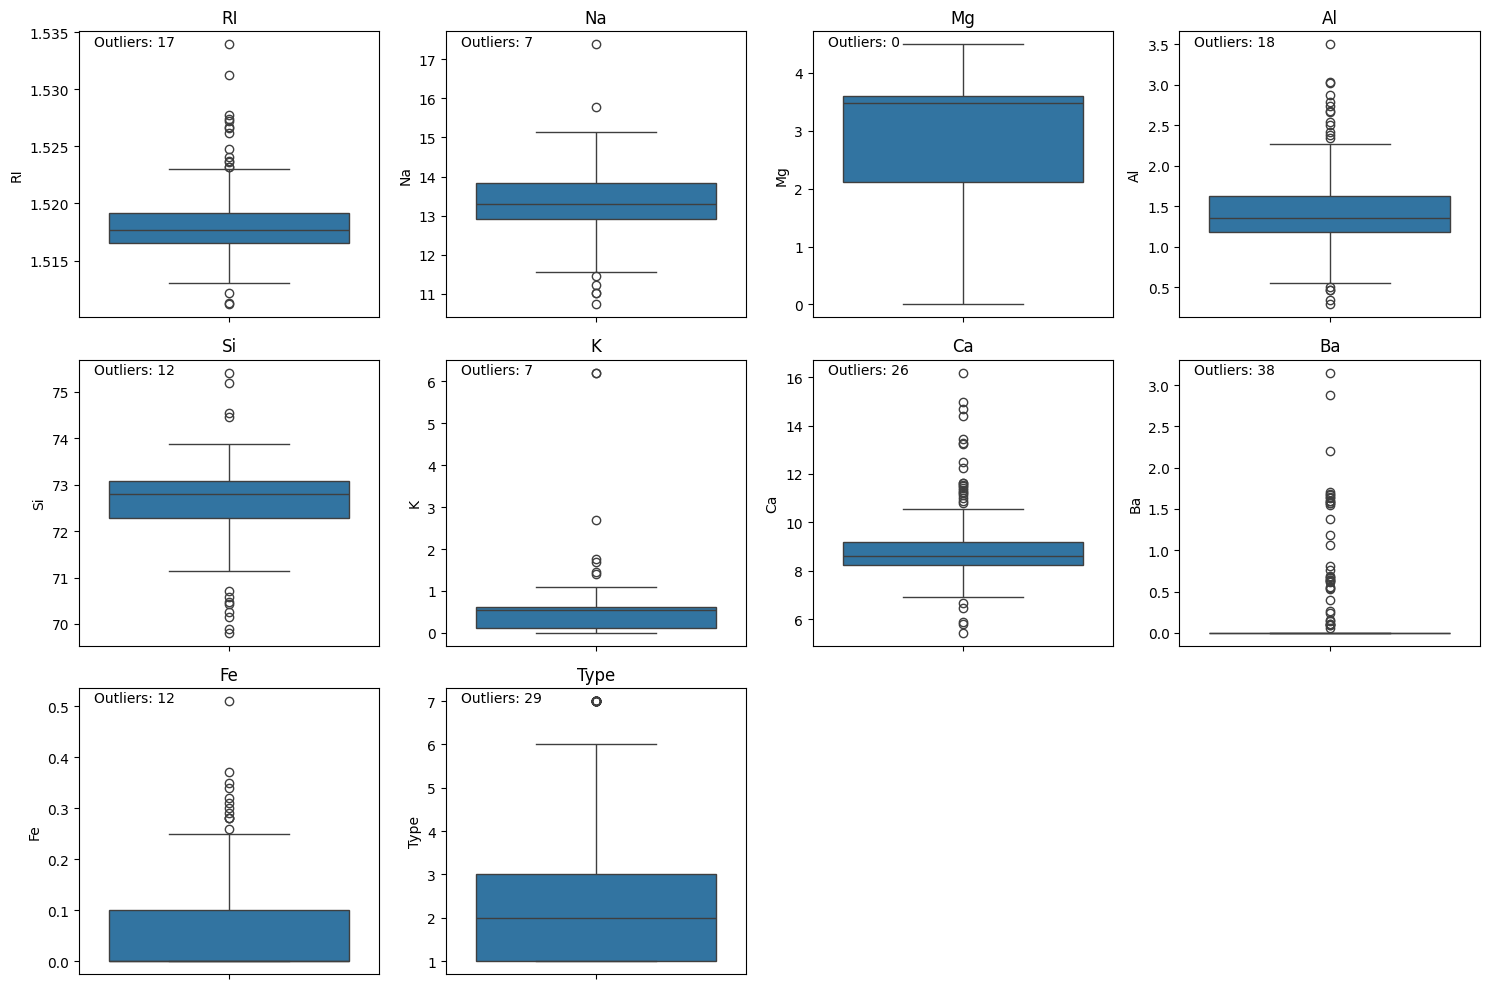

In [36]:
# 2. Box plots with detailed outlier analysis:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    # Calculate and display outlier information
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outlier_count = len(outliers)
    plt.text(0.05, 0.95, f"Outliers: {outlier_count}", transform=plt.gca().transAxes) #show number of outliers
plt.tight_layout()
plt.show()

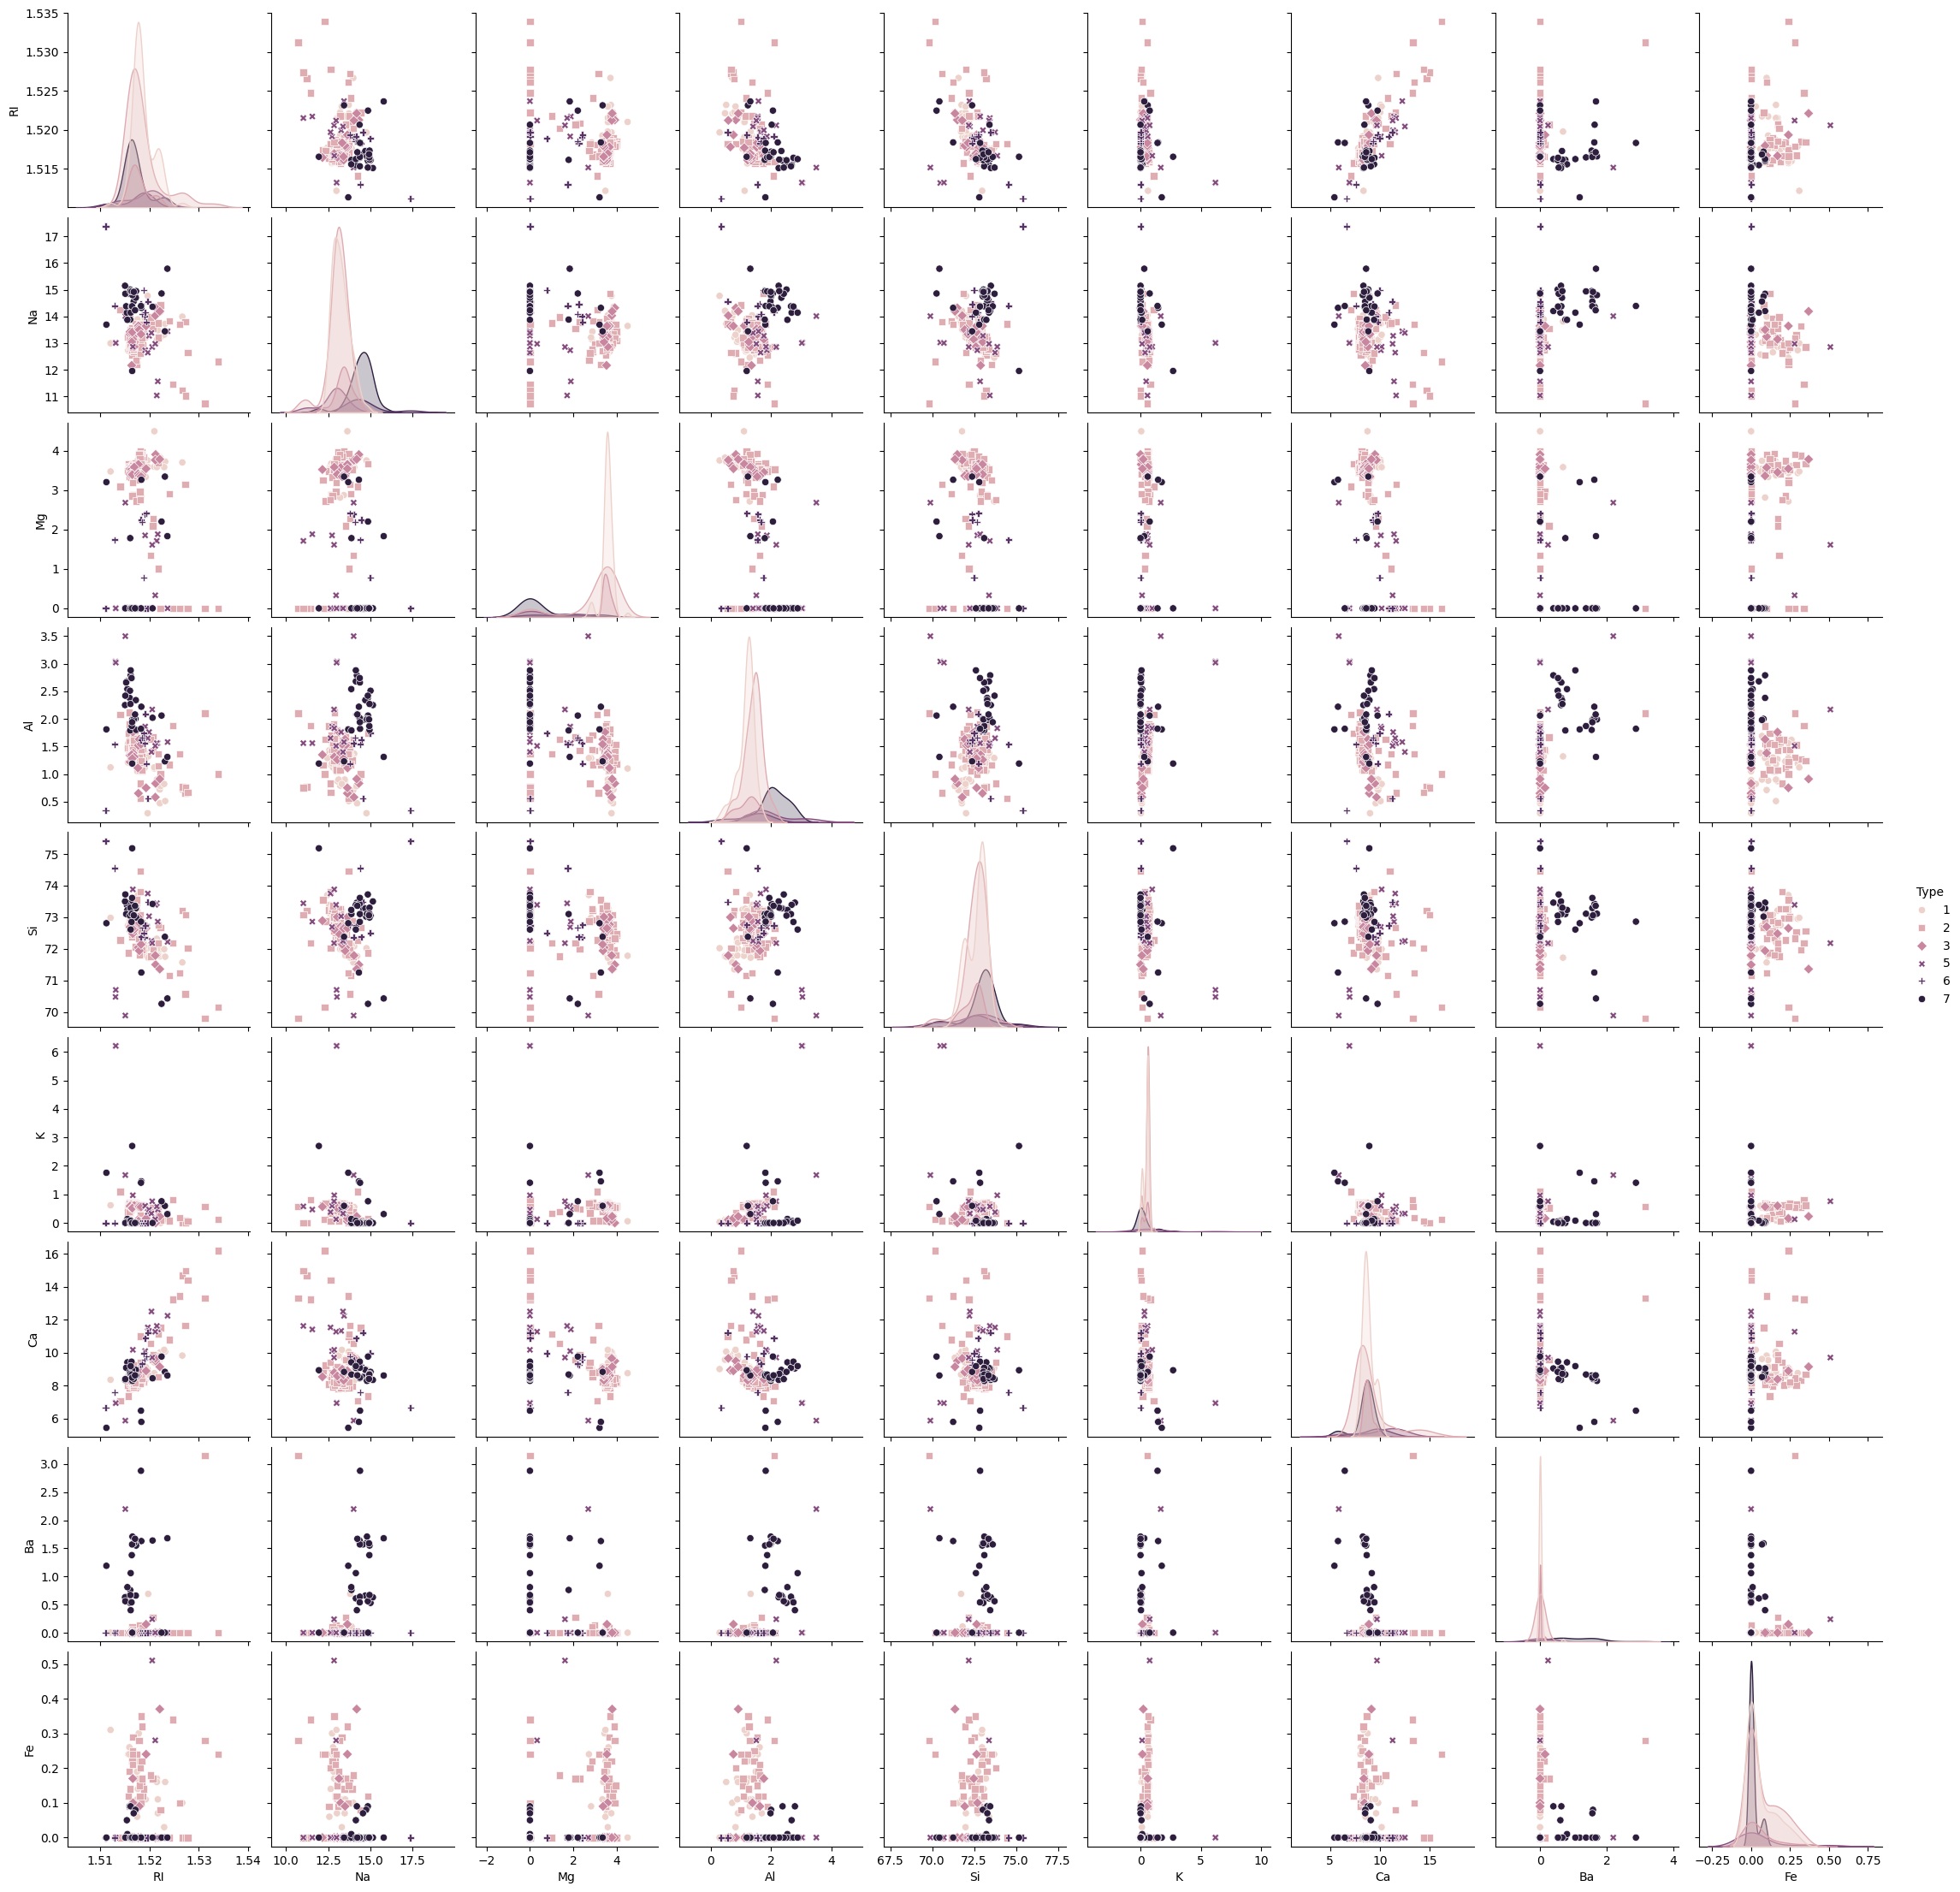

In [37]:
# 3. Pair plot with better customization:
sns.pairplot(df, hue='Type', diag_kind='kde', markers=["o", "s", "D", "X", "P"])
plt.show()

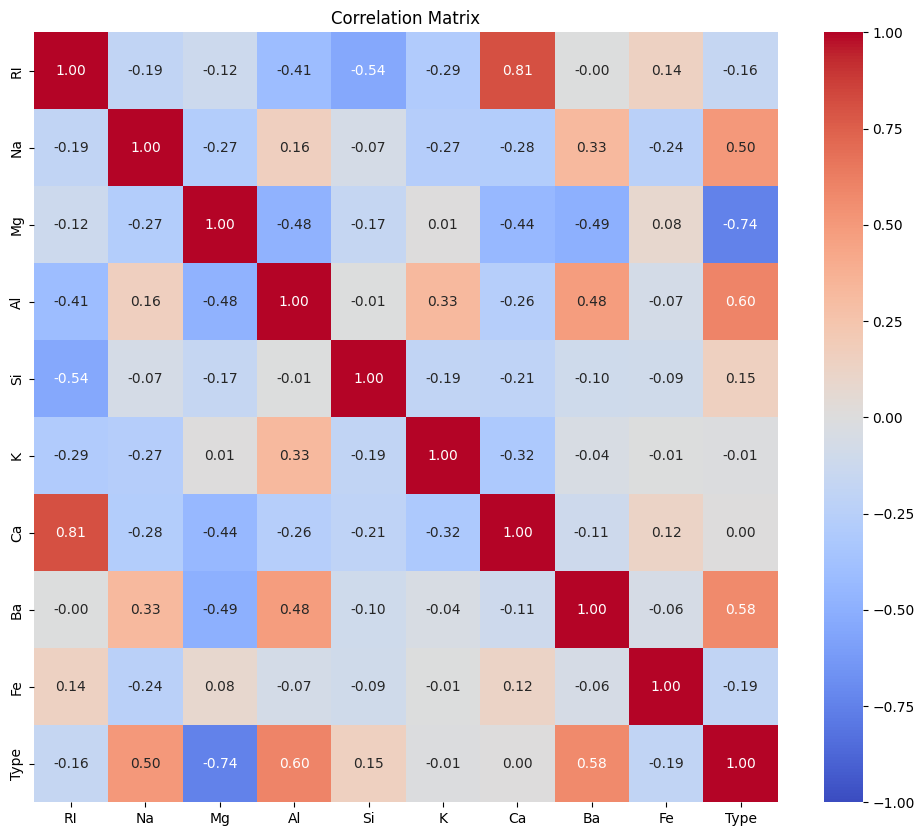

In [38]:
# 4. Enhanced Correlation Matrix:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1) # better formatting
plt.title('Correlation Matrix')
plt.show()

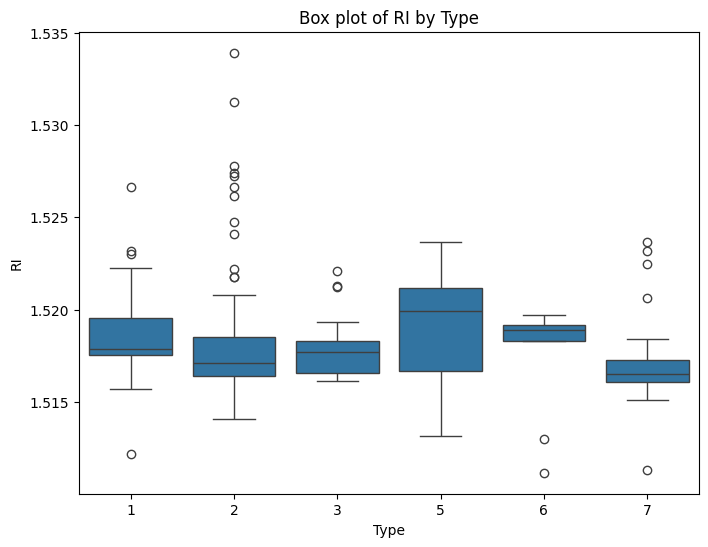

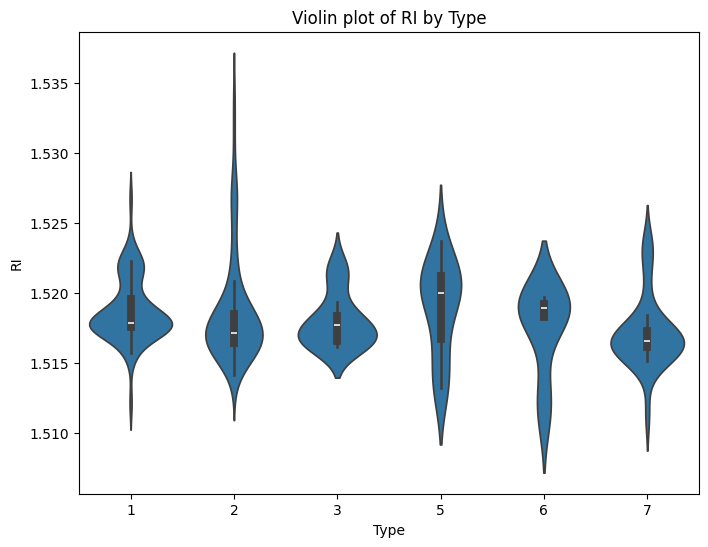

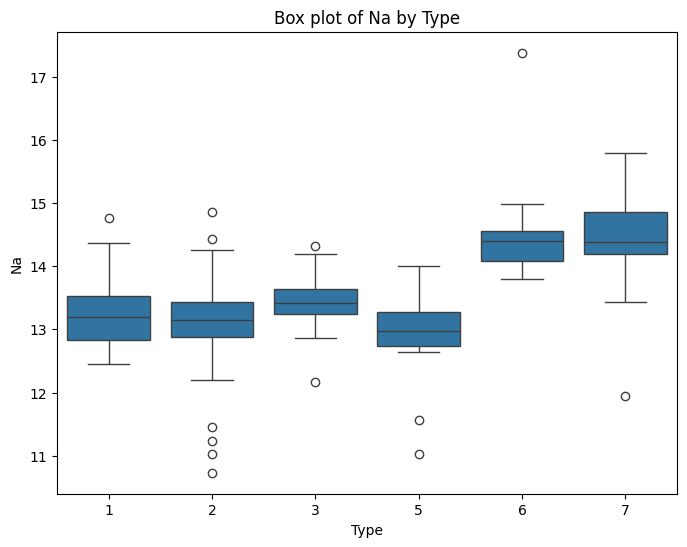

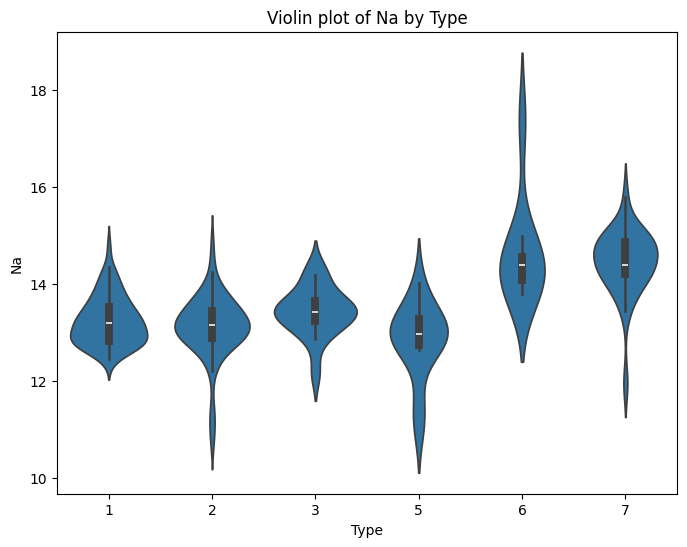

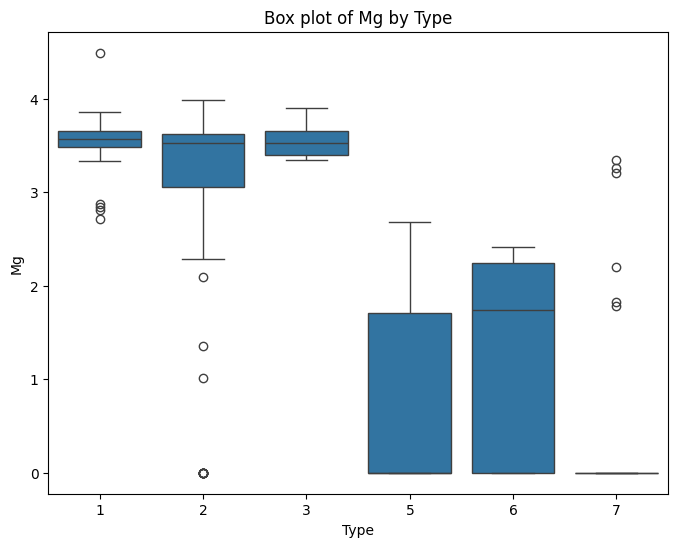

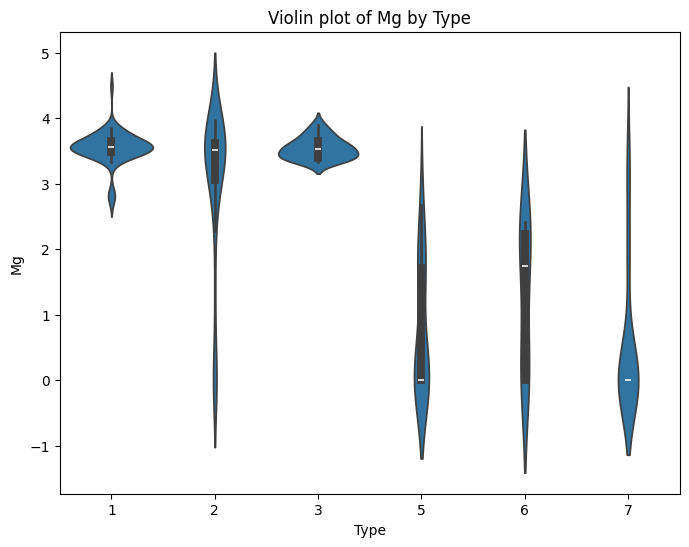

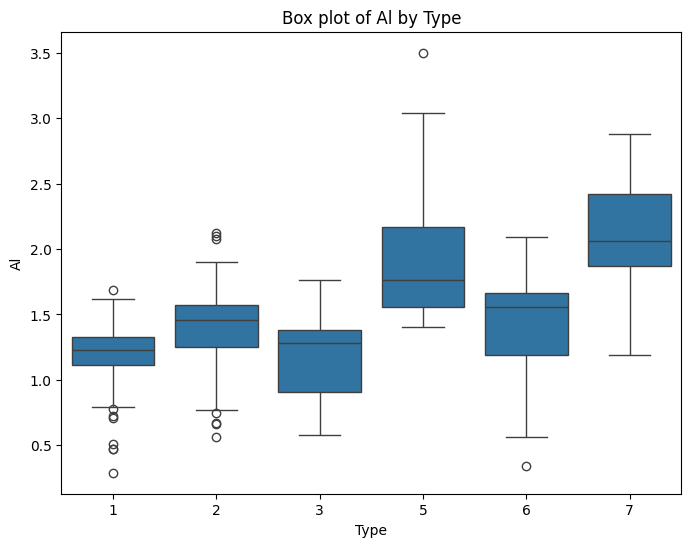

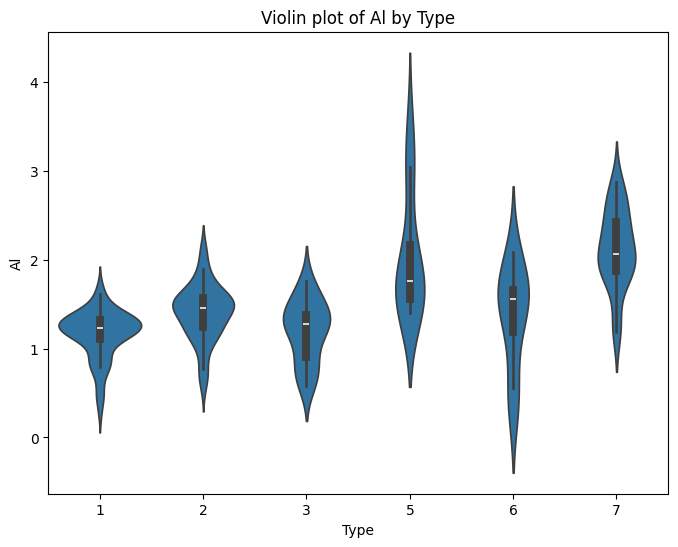

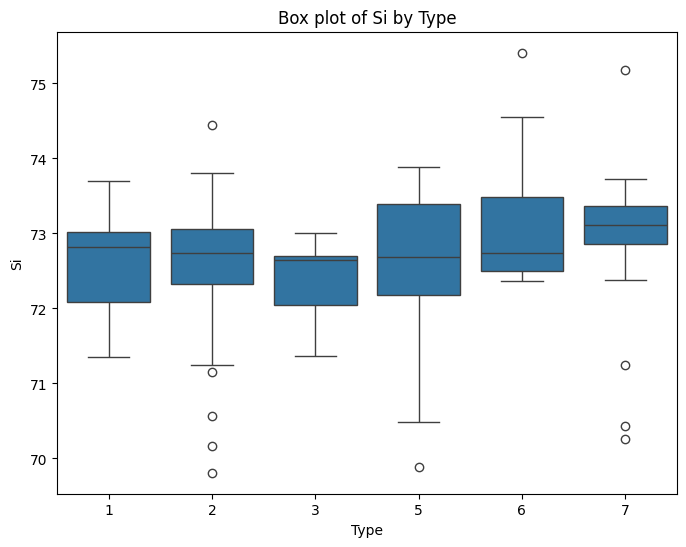

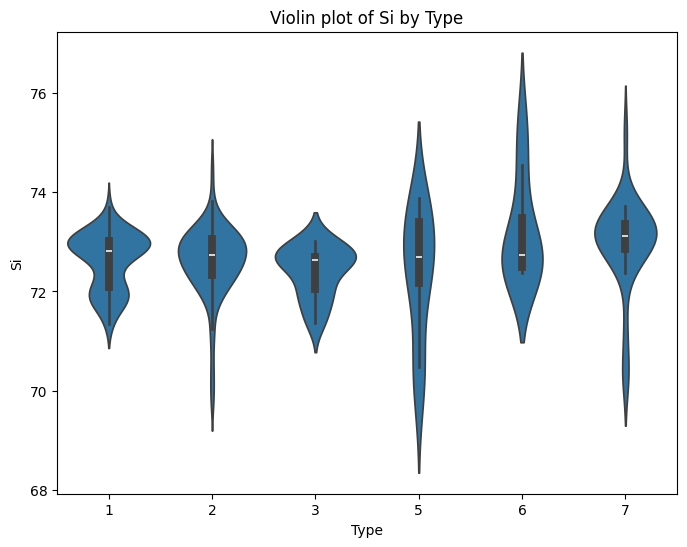

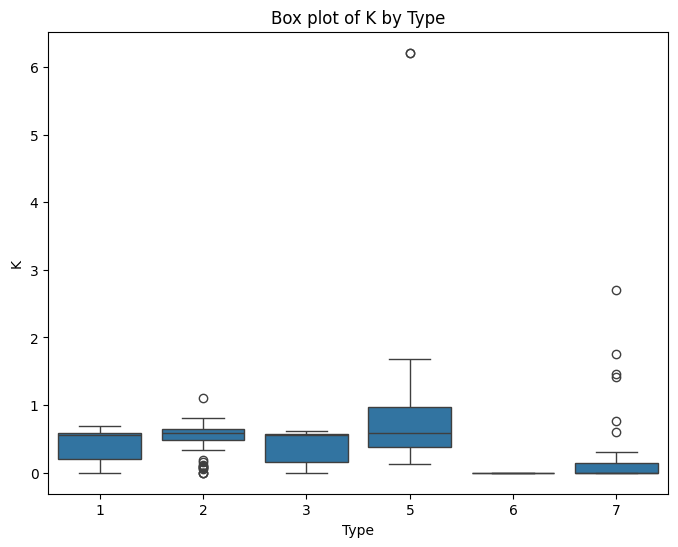

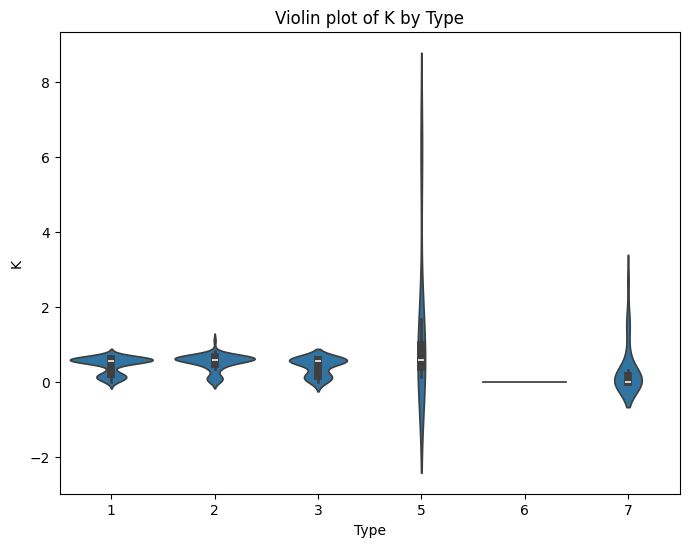

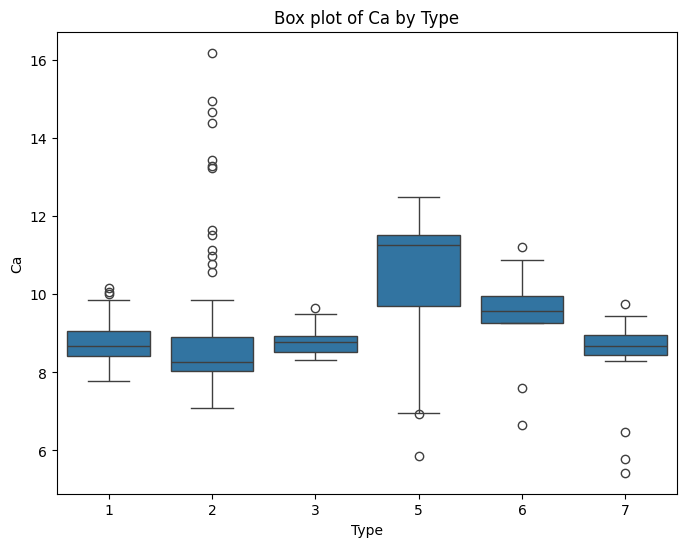

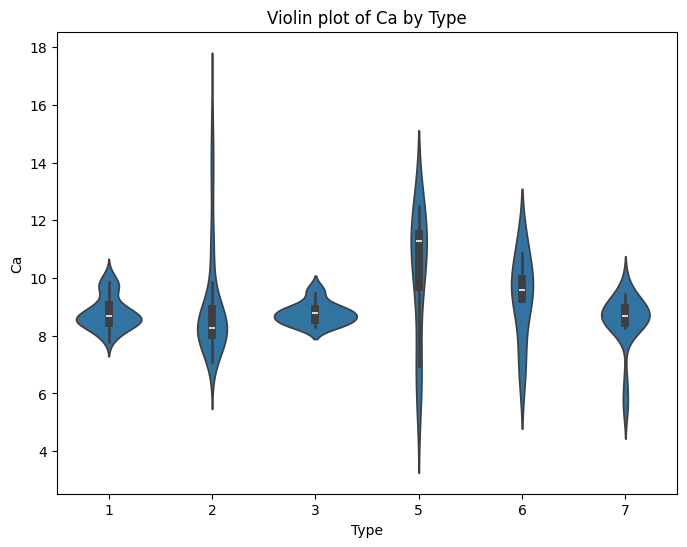

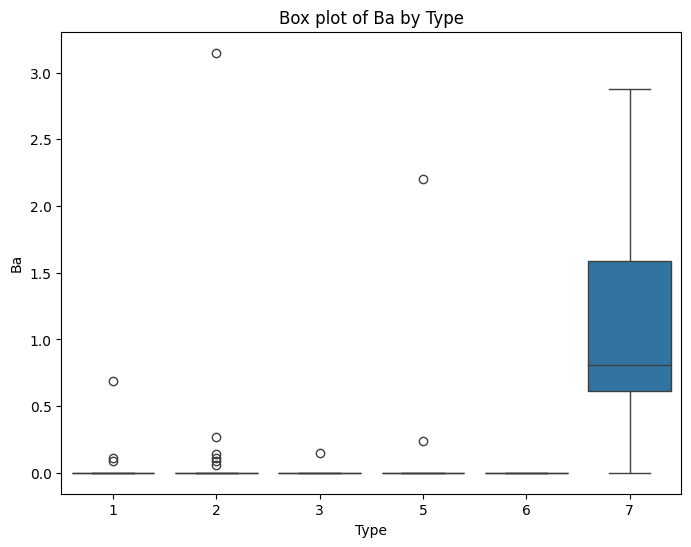

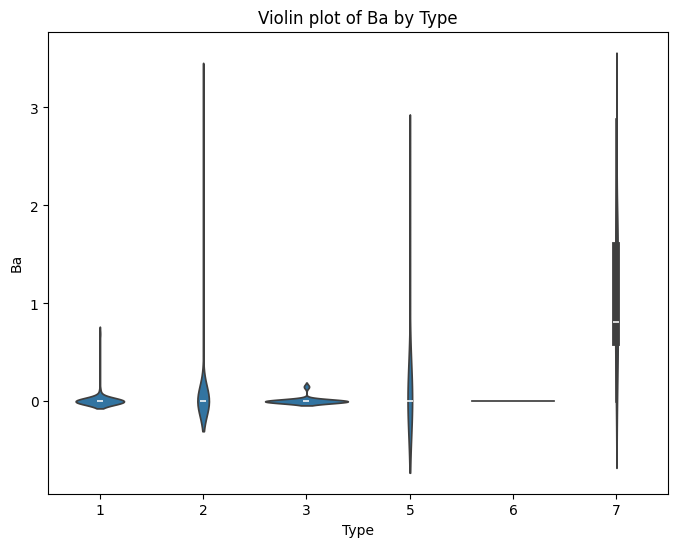

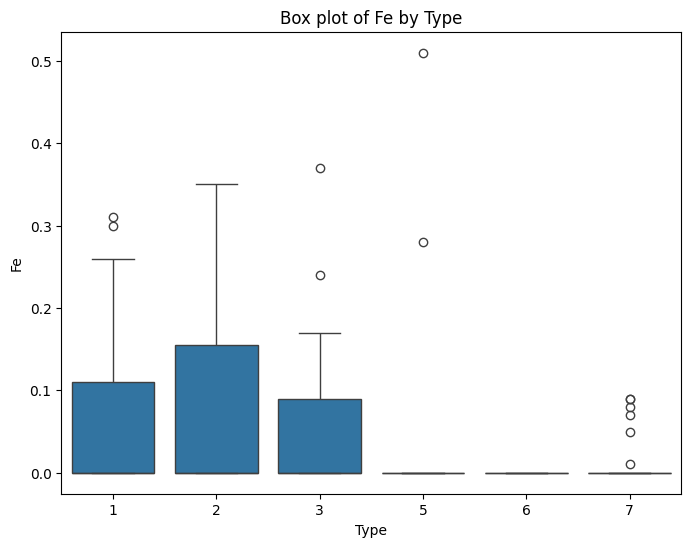

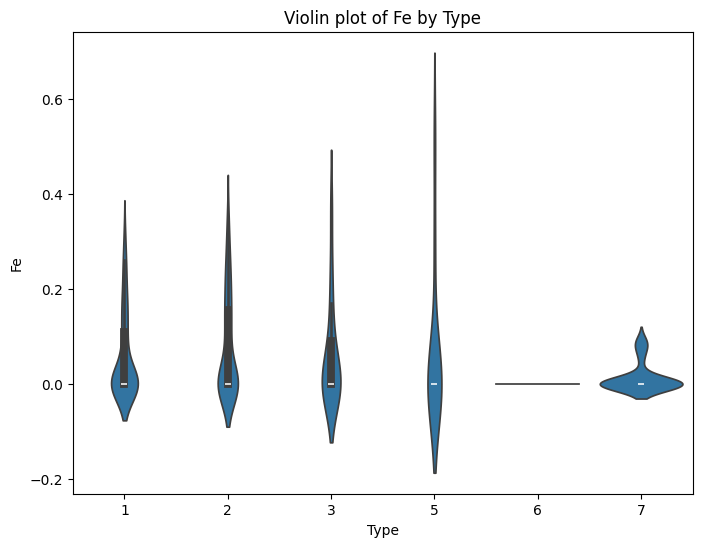

In [40]:
# 5. Explore relationships between features and the target variable (assuming "Type" is your target)
for col in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Type', y=col, data=df)
    plt.title(f'Box plot of {col} by Type')
    plt.show()


    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Type', y=col, data=df) # violin plots for different types
    plt.title(f'Violin plot of {col} by Type')
    plt.show()

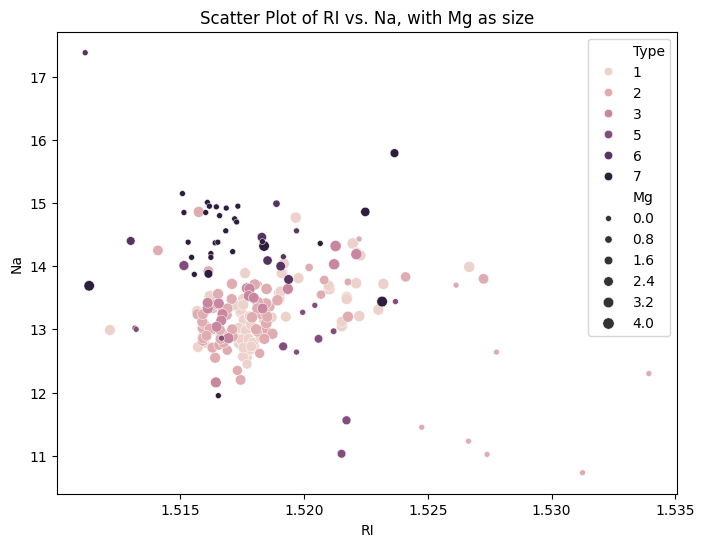

In [41]:
# 6. Analyze specific feature relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RI', y='Na', data=df, hue='Type', size = 'Mg') #show mg as the size
plt.title('Scatter Plot of RI vs. Na, with Mg as size')
plt.show()

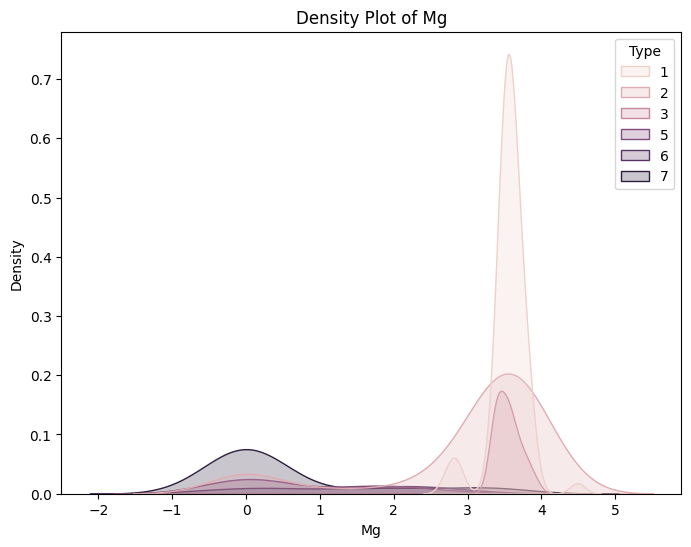

In [42]:
# Density plots
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Mg', hue='Type', fill=True)
plt.title('Density Plot of Mg')
plt.show()

3:Data Preprocessing

In [44]:
# Check for missing values again (after potential imputation or removal)
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [49]:
# Example using mean imputation for numerical columns:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].mean())
        print(df[col])

0      1.52101
1      1.51761
2      1.51618
3      1.51766
4      1.51742
        ...   
209    1.51623
210    1.51685
211    1.52065
212    1.51651
213    1.51711
Name: RI, Length: 214, dtype: float64
0      13.64
1      13.89
2      13.53
3      13.21
4      13.27
       ...  
209    14.14
210    14.92
211    14.36
212    14.38
213    14.23
Name: Na, Length: 214, dtype: float64
0      4.49
1      3.60
2      3.55
3      3.69
4      3.62
       ... 
209    0.00
210    0.00
211    0.00
212    0.00
213    0.00
Name: Mg, Length: 214, dtype: float64
0      1.10
1      1.36
2      1.54
3      1.29
4      1.24
       ... 
209    2.88
210    1.99
211    2.02
212    1.94
213    2.08
Name: Al, Length: 214, dtype: float64
0      71.78
1      72.73
2      72.99
3      72.61
4      73.08
       ...  
209    72.61
210    73.06
211    73.42
212    73.61
213    73.36
Name: Si, Length: 214, dtype: float64
0      0.06
1      0.48
2      0.39
3      0.57
4      0.55
       ... 
209    0.08
210    0.00

In [50]:
# Example using mode imputation for categorical columns (if any):
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].fillna(df[col].mode()[0])
    print(df[col])
    print(df[col].mode())

# Example for removing rows with missing values:
df = df.dropna()
print(df.dropna())

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [51]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
# OneHotEncoder setup
encoder = OneHotEncoder(sparse_output=False, drop=None)  # sparse_output=False for dense arrays

# Define categorical_columns
categorical_columns = df.select_dtypes(include=['object']).columns # Get categorical columns from the DataFrame

# Loop through each categorical column
for col in categorical_columns:
    # Check the number of unique categories
    if df[col].nunique() < 5:  # Condition for less than 5 unique categories
        # Perform One-Hot Encoding
        encoded_data = encoder.fit_transform(df[[col]])

        # Create new column names for the encoded features
        encoded_cols = [f"{col}_{category}" for category in encoder.categories_[0]]

        # Add encoded columns to the DataFrame
        df_encoded = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index)
        df = pd.concat([df, df_encoded], axis=1)

        # Drop the original column
        df.drop(columns=[col], inplace=True)

# Print the resulting DataFrame
print(df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

In [55]:
# Assuming 'Type' is your target variable
X = df.drop('Type', axis=1)
y = df['Type']

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]


In [56]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print(X_resampled)

[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [-0.72451755 -0.91553393 -1.86551055 ...  0.10637241  0.25262473
  -0.5483051 ]
 [-0.42593408  1.83194779 -1.86551055 ... -0.32133902  2.8785826
  -0.5864509 ]
 [-0.39853528  1.54067499 -1.86551055 ... -0.90267718  3.88227023
  -0.5864509 ]]


4: Random Forest Model Implementation

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# Assuming X_resampled and y_resampled are your features and target after SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42) # 80% train, 20% test

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (364, 9)
X_test shape: (92, 9)
y_train shape: (364,)
y_test shape: (92,)


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [64]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9239130434782609

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92


Confusion Matrix:
 [[13  2  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 17]]


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [70]:
# Initialize the model (e.g., RandomForestClassifier)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Now precision_score is defined
recall = recall_score(y_test, y_pred, average='weighted') # Now recall_score is defined
f1 = f1_score(y_test, y_pred, average='weighted') # Now f1_score is defined

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9239130434782609
Precision: 0.926268115942029
Recall: 0.9239130434782609
F1 Score: 0.9234046297904994


5: Bagging and Boosting Methods

In [72]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [74]:
# Bagging
# Replace 'base_estimator' with 'estimator'
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)
bagging_pred = bagging_classifier.predict(X_test)

In [75]:
# Evaluate Bagging
print("Bagging Accuracy:", accuracy_score(y_test, bagging_pred))
print("\nBagging Classification Report:\n", classification_report(y_test, bagging_pred))

Bagging Accuracy: 0.9347826086956522

Bagging Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.89      0.89      0.89        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.93        92
   macro avg       0.93      0.94      0.94        92
weighted avg       0.94      0.93      0.93        92



In [76]:
# AdaBoosting
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier.fit(X_train, y_train)
ada_pred = ada_classifier.predict(X_test)

In [78]:
# Evaluate AdaBoosting
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))
print("\nAdaBoost Classification Report:\n", classification_report(y_test, ada_pred))

AdaBoost Accuracy: 0.532608695652174

AdaBoost Classification Report:
               precision    recall  f1-score   support

           1       0.35      0.82      0.49        17
           2       0.07      0.05      0.06        19
           3       0.60      0.30      0.40        10
           5       0.00      0.00      0.00        14
           6       1.00      1.00      1.00        14
           7       0.89      0.94      0.92        18

    accuracy                           0.53        92
   macro avg       0.49      0.52      0.48        92
weighted avg       0.47      0.53      0.48        92



In [79]:
# Gradient Boosting
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_pred = gb_classifier.predict(X_test)

In [80]:
# Evaluate Gradient Boosting
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.9456521739130435

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       1.00      0.89      0.94        19
           3       0.77      1.00      0.87        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.94        92
weighted avg       0.95      0.95      0.95        92



In [81]:
# Compare the results (you can add more metrics as needed)
print("\nComparison:")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Bagging Accuracy: {accuracy_score(y_test, bagging_pred)}")
print(f"AdaBoost Accuracy: {accuracy_score(y_test, ada_pred)}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred)}")


Comparison:
Random Forest Accuracy: 0.9239130434782609
Bagging Accuracy: 0.9347826086956522
AdaBoost Accuracy: 0.532608695652174
Gradient Boosting Accuracy: 0.9456521739130435


Additional Notes:

1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging:

Trains models independently on random subsets of the data (e.g., Random Forest). It reduces variance by averaging predictions.

Boosting:

Trains models sequentially, where each model corrects the errors of the previous one (e.g., AdaBoost, XGBoost). It reduces bias by focusing on hard-to-predict examples.

Key Differences:

Training Process:
Bagging: Models are trained independently and in parallel.
Boosting: Models are trained sequentially, where each model learns from the mistakes of the previous one.
Focus:
Bagging: Focuses on reducing variance (avoiding overfitting).
Boosting: Focuses on reducing bias (improving accuracy).
Aggregation:
Bagging: Aggregates predictions by voting (classification) or averaging (regression).

Boosting: Aggregates predictions through a weighted sum.

Examples:

Bagging: Random Forest.
Boosting: AdaBoost, XGBoost.



2.Explain how to handle imbalance in the data.


Resampling: Oversample the minority class (e.g., SMOTE) or undersample the majority class.

Cost-Sensitive Learning: Assign higher weights to the minority class.

Ensemble Methods: Use techniques like Balanced Random Forest to improve performance on imbalanced datasets.

Evaluation Metrics: Use Precision, Recall, F1-score, and ROC-AUC instead of accuracy.